# **QSAR Model Building of 1,3-betaglucansynthase Inhibitors**

Vishal Bhoir

*PhD Student*

# Read in data

In [1]:
import pandas as pd

In [2]:
dataset_url = 'https://raw.githubusercontent.com/profvishalbhoir/cagsbav/main/CA_05_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.823909
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.387216
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.309804
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.318759
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.275724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11.698970
147,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11.045757
148,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11.301030
149,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11.096910


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
147,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
148,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
149,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0       4.823909
1       4.387216
2       4.309804
3       4.318759
4       4.275724
         ...    
146    11.698970
147    11.045757
148    11.301030
149    11.096910
150    11.000000
Name: pIC50, Length: 151, dtype: float64

# Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP13,PubchemFP16,PubchemFP21,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP115,PubchemFP116,PubchemFP143,...,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP813,PubchemFP818,PubchemFP819,PubchemFP824,PubchemFP826
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,1,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,1,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,1,1,0,0,0,0,0,0,1,...,1,1,1,1,1,0,1,1,0,1
147,1,1,1,0,0,0,0,0,0,1,...,1,1,1,1,1,0,1,1,0,1
148,1,1,1,0,0,0,0,0,0,1,...,1,1,1,1,1,0,1,1,0,1
149,1,1,1,0,0,0,0,0,0,1,...,1,1,1,1,1,0,1,1,0,1


In [6]:
X.to_csv('descriptor_list.csv', index = False)

In [7]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9658227367907983

## Model Prediction

In [10]:
Y_pred = model.predict(X)
Y_pred

array([ 4.73057257,  4.48083033,  4.39781855,  4.42945607,  4.31272342,
        4.18952636,  4.21064041,  4.21283101,  4.47683739,  4.28185391,
        4.1471025 ,  4.25310968,  4.34730625,  4.36738524,  5.39668879,
        4.1471025 ,  6.51658653, 10.31163195, 10.56108635, 10.05878644,
        9.69660506,  9.61208451,  8.76277057,  9.49815042,  9.50703424,
        9.11646536,  9.2972082 ,  9.1058101 ,  9.08360019,  9.21545645,
        9.21545645,  9.21545645,  9.10532549,  8.91804134,  9.11646536,
        8.51095846,  9.11646536,  8.82918492,  8.7140835 ,  8.77905202,
        8.86521159,  8.68213992,  8.54979652,  8.67420733,  8.82971895,
        8.54979652,  8.51095846,  8.42896489,  8.54979652,  8.61438763,
        8.41937243,  8.51095846,  8.52684949,  8.31963265,  8.47316501,
        9.17860382,  9.01248945,  9.31689844,  8.86526828,  9.53610537,
        8.35223155,  9.50244329, 10.05268359,  9.06763055,  9.41353542,
        9.38485228, 10.15474014,  9.98276192, 10.07858878,  9.69

## Model Performance

In [11]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.12
Coefficient of determination (R^2): 0.97


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

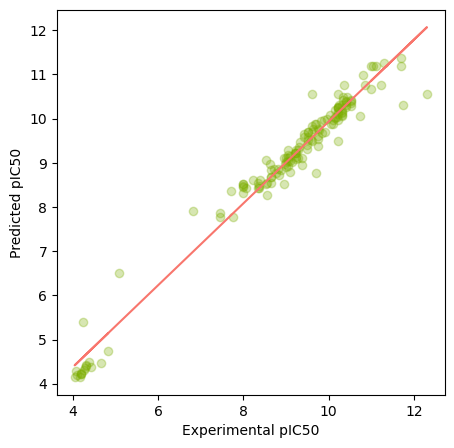

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [14]:
import pickle

In [15]:
pickle.dump(model, open('cagsbioactivity_model.pkl', 'wb'))